In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\GM\Downloads\Latest DS Material\Day 14-Multi Linear Regression\Data Sets\Toyoto_Corrola.csv', index_col=0)
data

,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Price      1436 non-null   int64 
 2   Age_08_04  1436 non-null   int64 
 3   KM         1436 non-null   int64 
 4   HP         1436 non-null   int64 
 5   Doors      1436 non-null   int64 
 6   Cylinders  1436 non-null   int64 
 7   Gears      1436 non-null   int64 
 8   Weight     1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 112.2+ KB


In [4]:
data.describe()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [5]:
data.isnull().sum()

Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
colname=[]
for x in data.columns:
    if data[x].dtypes=='object':
        colname.append(x)
colname     

['Model']

In [7]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Model
mapping {'TOYOTA Corolla ': 0, 'TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors': 1, 'TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors': 2, 'TOYOTA Corolla 1.3 16V 2/3-Doors': 3, 'TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors': 4, 'TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors': 5, 'TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors': 6, 'TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-Doors': 7, 'TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors': 8, 'TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-Doors': 9, 'TOYOTA Corolla 1.3 16V HATCHB S 2/3-Doors': 10, 'TOYOTA Corolla 1.3 16V L. TERRA COMFORT 2/3-Doors': 11, 'TOYOTA Corolla 1.3 16V LB Linea Luna 4/5-Doors': 12, 'TOYOTA Corolla 1.3 16V LIFTB G6 4/5-Doors': 13, 'TOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-Doors': 14, 'TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-Doors': 15, 'TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-Doors': 16, 'TOYOTA Corolla 1.3 16V Linea Terra 2/3-Doors': 17, 'TO

In [8]:
data.head()

,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,,
1,257,13500,23,46986,90,3,4,5,1165
2,257,13750,23,72937,90,3,4,5,1165
3,365,13950,24,41711,90,3,4,5,1165
4,257,14950,26,48000,90,3,4,5,1165
5,256,13750,30,38500,90,3,4,5,1170


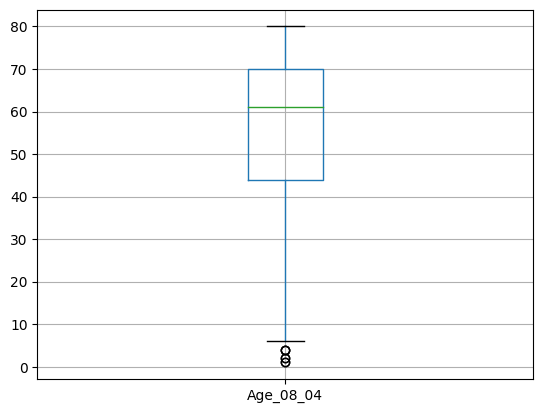

In [9]:
data.boxplot(column='Age_08_04')
plt.show()

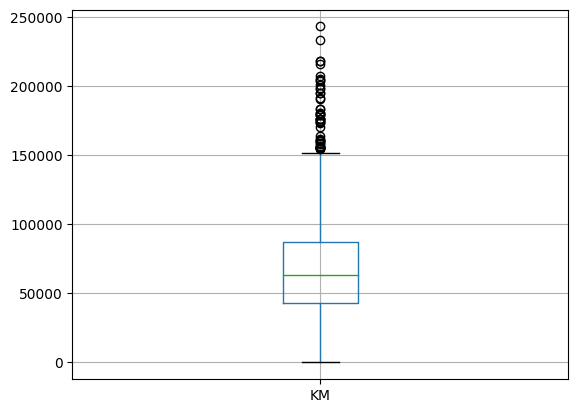

In [10]:
data.boxplot(column='KM')
plt.show()

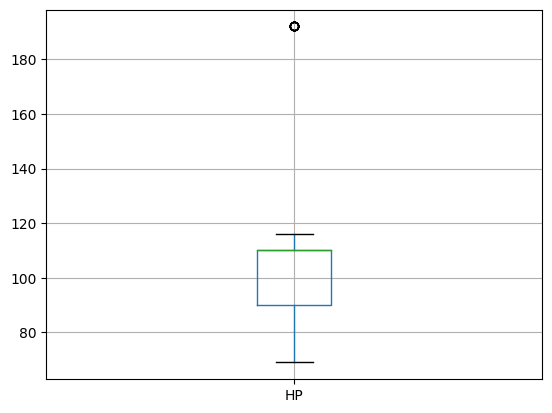

In [11]:
data.boxplot(column='HP')
plt.show()

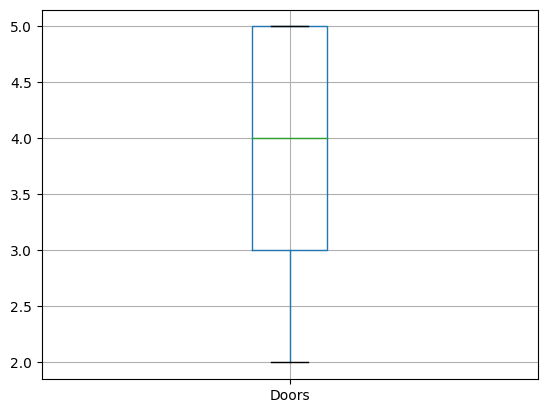

In [12]:
data.boxplot(column='Doors')
plt.show()

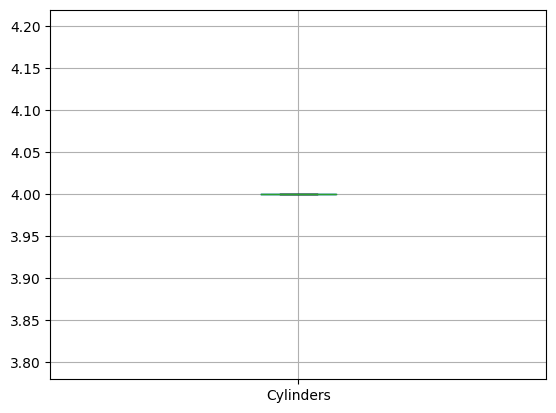

In [13]:
data.boxplot(column='Cylinders')
plt.show()

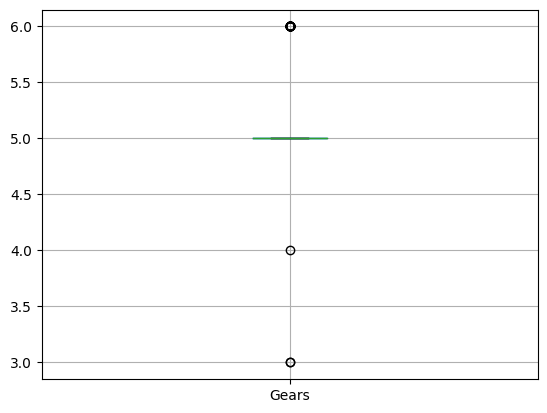

In [14]:
data.boxplot(column='Gears')
plt.show()

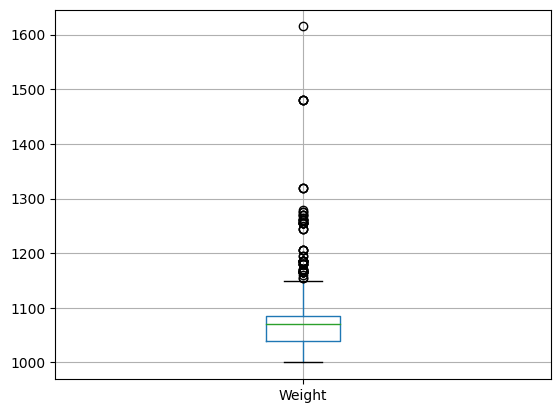

In [15]:
data.boxplot(column='Weight')
plt.show()

In [16]:
data.drop(data[data["HP"]>180].index,axis=0,inplace=True)

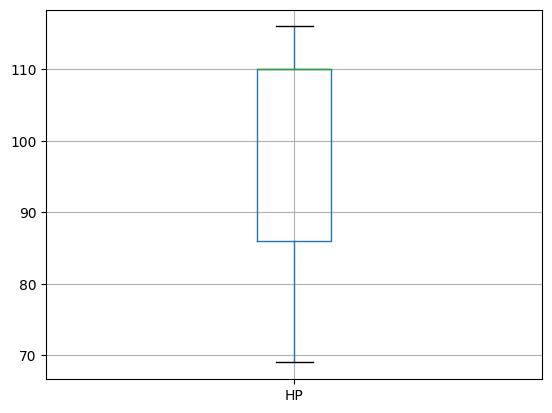

In [17]:
data.boxplot(column='HP')
plt.show()

In [29]:
X =data[['Model', 'Age_08_04', 'KM','HP', 'Doors', 'Cylinders', 'Gears','Weight']]
Y = data['Price']

In [30]:
corr_df=X.corr(method='pearson')
print(corr_df)

              Model  Age_08_04        KM        HP     Doors  Cylinders  \
Model      1.000000  -0.312102  0.061144 -0.031758  0.156851        NaN   
Age_08_04 -0.312102   1.000000  0.501137 -0.100082 -0.156376        NaN   
KM         0.061144   0.501137  1.000000 -0.344114 -0.041538        NaN   
HP        -0.031758  -0.100082 -0.344114  1.000000  0.137874        NaN   
Doors      0.156851  -0.156376 -0.041538  0.137874  1.000000        NaN   
Cylinders       NaN        NaN       NaN       NaN       NaN        NaN   
Gears     -0.053522   0.035237  0.039876  0.074049 -0.151129        NaN   
Weight     0.486951  -0.456870 -0.013588 -0.014136  0.318032        NaN   

              Gears    Weight  
Model     -0.053522  0.486951  
Age_08_04  0.035237 -0.456870  
KM         0.039876 -0.013588  
HP         0.074049 -0.014136  
Doors     -0.151129  0.318032  
Cylinders       NaN       NaN  
Gears      1.000000 -0.036594  
Weight    -0.036594  1.000000  


In [32]:
sns.heatmap(corr_df,annot=True)

<Axes: >

In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [35]:
X

array([[ 1.33361931, -1.79430187, -0.5817912 , ...,  0.        ,
        -0.12334651,  1.80170785],
       [ 1.33361931, -1.79430187,  0.11032715, ...,  0.        ,
        -0.12334651,  1.80170785],
       [ 2.44221944, -1.74020861, -0.7224765 , ...,  0.        ,
        -0.12334651,  1.80170785],
       ...,
       [-1.22231989,  0.80217456, -1.38109707, ...,  0.        ,
        -0.12334651, -1.09110999],
       [-1.22231989,  0.7480813 , -1.38376409, ...,  0.        ,
        -0.12334651, -1.09110999],
       [ 0.3687266 ,  1.07264085, -1.83489051, ...,  0.        ,
        -0.12334651,  0.81814979]])

In [36]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [37]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()

#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

10618.115097670743
[-1.05742667e+02 -2.28029715e+03 -7.55233135e+02  2.75850375e+02
  7.47403761e+00 -4.54747351e-13  8.99344457e+01  9.32085309e+02]


In [40]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[10941.39253832 16300.20405449  9911.20871013  6565.72938664
 10959.97943119  8918.79559478 12796.29286435  8581.65655081
 10636.84554836  9976.27404844 19402.14465378 11036.39349688
 19370.77936182 16557.01543298 11866.52374121 17661.64987116
 13010.09989031  9755.10433442 11289.43533955  8144.11553654
 17929.37579495  8495.81049364  8988.78770405 18338.68519667
 10348.6973628  11088.75044846  8198.05343099  9958.73241685
 10199.86056072 10751.69672517  9712.45127347 16433.16150283
  7690.26844825  7805.82529615  6963.2584266   7864.55651261
 12914.56525482  7981.66487308 11120.91808708 15266.52239221
  7027.72015452  9419.49665113 10625.23135679  9293.86354178
 13336.12078235 15946.69289549  8178.22852315  9202.11095802
 18322.89115427 10128.24726579 11174.28578885 10883.72198592
 11364.71344403  6504.26875921 16489.17109777  8473.29357472
  8602.93399041  9153.48084136 13084.33990742 11489.34493239
 16127.45015729 15350.10939766 13483.57592508  9843.79685619
 13192.84310372  8015.86

In [41]:
lm.score(X_train,Y_train)

0.8510977142996689

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2*100,'%')

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

R-squared: 88.05006017862922 %
RMSE: 1177.6964165384657
